In [1]:
import torch
import lib.utils.bookkeeping as bookkeeping
from torch.utils.data import DataLoader
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import lib.models.models as models
import lib.models.model_utils as model_utils
from lib.datasets import mnist, maze, protein, synthetic
import lib.datasets.dataset_utils as dataset_utils
import lib.losses.losses as losses
import lib.losses.losses_utils as losses_utils
import lib.training.training as training
import lib.training.training_utils as training_utils
import lib.optimizers.optimizers as optimizers
import lib.optimizers.optimizers_utils as optimizers_utils
import lib.sampling.sampling as sampling
import lib.sampling.sampling_utils as sampling_utils
import os
from lib.datasets.maze import maze_acc
from ruamel.yaml.scalarfloat import ScalarFloat

In [2]:
# creating path

path = 'SavedModels/BIN-MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-17' # 2
config_name = 'config_001_unet3M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_199999_unet3M.pt' 

path = 'SavedModels/MAZEprotein/'
date = "2023-12-23"
config_name = "config_001_score.yaml"
model_name = "model_199999_score.pt"

path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-23' # 2
config_name = 'config_001.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_9999.pt' #  model_299999_hollowMLEProb.pt


path = "SavedModels/SyntheticBert/"
date = '2023-12-28' # 2
config_name = 'config_001_bert500K.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_bert500K.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-28' # 2
config_name = 'config_001_hollowelbo.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_259999_hollowelbo.pt' 


path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-03' # 2
config_name = 'config_001_hollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_539999_hollow.pt'



path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-03' # 2
config_name = 'config_001_hollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_539999_hollow.pt'

path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'



path = 'SavedModels/MNIST/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-25' # 2
config_name = 'config_001_unet14Mlogits.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_599999_unet14Mlogits.pt'

path = 'SavedModels/MAZEunet/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-30' # 2
config_name = 'config_001_lastunet.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_399999_lastunet.pt'

path = 'SavedModels/MNISTHollow/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2024-01-03' # 2
config_name = 'config_001_hollow.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_539999_hollow.pt'

path = 'SavedModels/MAZE/' # 'SavedModels/MAZE/' 'SavedModels/MNIST/'
date = '2023-12-22' # 2
config_name = 'config_001_hollow8M.yaml' # config_001_hollowMLEProb.yaml
model_name = 'model_299999_hollow8M.pt' 

config_path = os.path.join(path, date, config_name)
checkpoint_path = os.path.join(path, date, model_name)



In [3]:
# creating models
cfg = bookkeeping.load_config(config_path)
cfg.sampler.name = 'CRMLBJF' #ExactSampling' # ElboLBJF CRMTauL CRMLBJF
cfg.sampler.num_corrector_steps = 0
cfg.sampler.corrector_entry_time = ScalarFloat(0.0)
cfg.sampler.num_steps = 500
cfg.sampler.is_ordinal = True

#print(cfg)
device = torch.device(cfg.device)
print(device)

model = model_utils.create_model(cfg, device)
print("number of parameters: ", sum([p.numel() for p in model.parameters()]))

#modified_model_state = utils.remove_module_from_keys(loaded_state['model'])
#model.load_state_dict(modified_model_state)
#optimizer = optimizers_utils.get_optimizer(model.parameters(), cfg)
optimizer = torch.optim.Adam(model.parameters(), cfg.optimizer.lr)

sampler = sampling_utils.get_sampler(cfg)

state = {"model": model, "optimizer": optimizer, "n_iter": 0}
state = bookkeeping.load_state(state, checkpoint_path)
state['model'].eval()

# Maze:
# 80% TauL
# 84% LBJF
# 96%

cuda
number of parameters:  7808643
ema state dict function


In [7]:
n_samples = 49
samples, changes = sampler.sample(model, n_samples)
saved_samples = samples

500it [00:17, 28.44it/s]


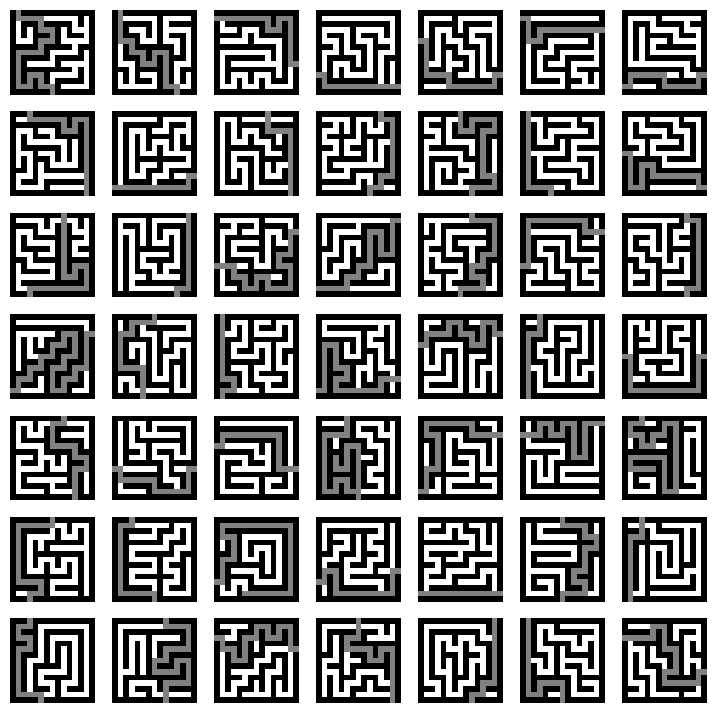

In [8]:
is_img = cfg.data.is_img

if is_img:
    samples = samples.reshape(n_samples, 1, cfg.data.image_size, cfg.data.image_size)
    saving_train_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    fig = plt.figure(figsize=(9, 9)) 
    for i in range(n_samples):
        plt.subplot(int(np.sqrt(n_samples)), int(np.sqrt(n_samples)), 1 + i)
        plt.axis("off")
        plt.imshow(np.transpose(samples[i, ...], (1,2,0)), cmap="gray")
 
 
    plt.savefig(saving_train_path)
    plt.show()
    plt.close()
else:
    bm, inv_bm = synthetic.get_binmap(cfg.model.concat_dim, cfg.data.binmode)
    print(inv_bm)
    samples = synthetic.bin2float(samples.astype(np.int32), inv_bm, cfg.model.concat_dim, cfg.data.int_scale)

 
    saving_plot_path = os.path.join(path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
    saving_np_path = os.path.join(path, f"samples_{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.npy")
    np.save(f'{saving_np_path}', samples)

    #aving_plot_path = '/Users/paulheller/PythonRepositories/Master-Thesis/ContTimeDiscreteSpace/TAUnSDDM/SavedModels/MNIST/'
    synthetic.plot_samples(samples, saving_plot_path, im_size=cfg.data.plot_size, im_fmt="png")

In [10]:
s3 = saved_samples[3, :]
s8 = saved_samples[8, :]
s10 = saved_samples[15, :]
s11 = saved_samples[39, :]

In [13]:
stacked_samples = np.vstack((s3, s8, s10, s11)).reshape(-1, 1, 15, 15)
print(stacked_samples.shape)

(4, 1, 15, 15)


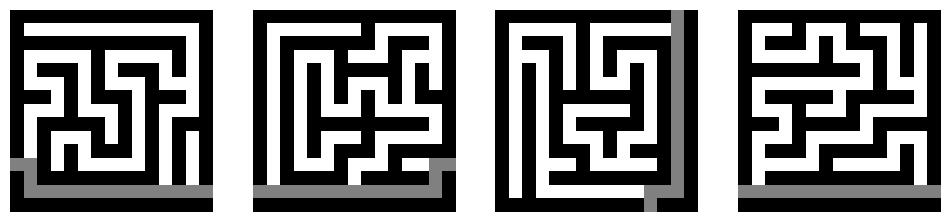

In [18]:
n_samples = 4
saving_train_path = os.path.join(cfg.saving.sample_plot_path, f"{cfg.model.name}{state['n_iter']}_{cfg.sampler.name}{cfg.sampler.num_steps}.png")
fig = plt.figure(figsize=(12, 3))  # Adjust the figure size as needed
for i in range(n_samples):
    plt.subplot(1, n_samples, 1+i)
    plt.axis("off")
    plt.imshow(np.transpose(stacked_samples[i, ...], (1, 2, 0)), cmap="gray")

plt.savefig('simple_mazes.png', bbox_inches='tight', transparent=True)  # Use bbox_inches to remove extra white space
plt.show()
plt.close()

In [ ]:
#np.save('lib/is_mnist/data/mnist_hollow_100exact1000.npy', saved_samples)

In [ ]:
#np.save('SavedModels/MNIST/mnist_2704LBJF1000_200.npy', saved_samples[0:200])